In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 2

## Part a

In [22]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    # hist = np.zeros(256,dtype=int)

    # for i in range(image.shape[0]):
    #     for j in range(image.shape[1]):
    #         hist[image[i][j]] += 1

    # Without Using Loop
    hist, _ = np.histogram(image, bins = 256, range = (0, 256))

    return hist

In [26]:
def calc_cdf(channel):
  '''
    Do not use libraries 
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''
  # cdf = np.zeros(256, dtype=float)
  # n = channel.shape[0] * channel.shape[1]
  histogram = calc_hist(channel)
  # current = 0

  # for i in range(256):
  #   current += histogram[i]
  #   cdf[i] = current / n

  # Without using Loop
  cdf = np.cumsum(histogram) / np.sum(histogram)

  return cdf


In [29]:
def hist_matching(src_image, ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of reference image
  '''
  output_image = src_image.copy()
  channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
  for channel, title in channels:
    src_cdf = calc_cdf(src_image[:, :, channel])
    ref_cdf = calc_cdf(ref_image[:, :, channel])
    
    table = np.zeros(256, dtype=int)
    ref_inverse = np.zeros(256, dtype=int)
    
    # for i in range(256):
    #   ref_inverse[int(ref_cdf[i] * 255)] = i
    # Without Using Loops

    ref_inverse[(ref_cdf * 255).astype(int)] = np.arange(256)

    ref_inverse = np.maximum.accumulate(ref_inverse) # For lost values

    table = ref_inverse[(src_cdf * 255).astype(int)]


    # for i in range(256):
    #   table[i] = ref_inverse[int(src_cdf[i] * 255)]
    
    output_image[:, :, channel] = table[src_image[:, :, channel]]
  
  return output_image

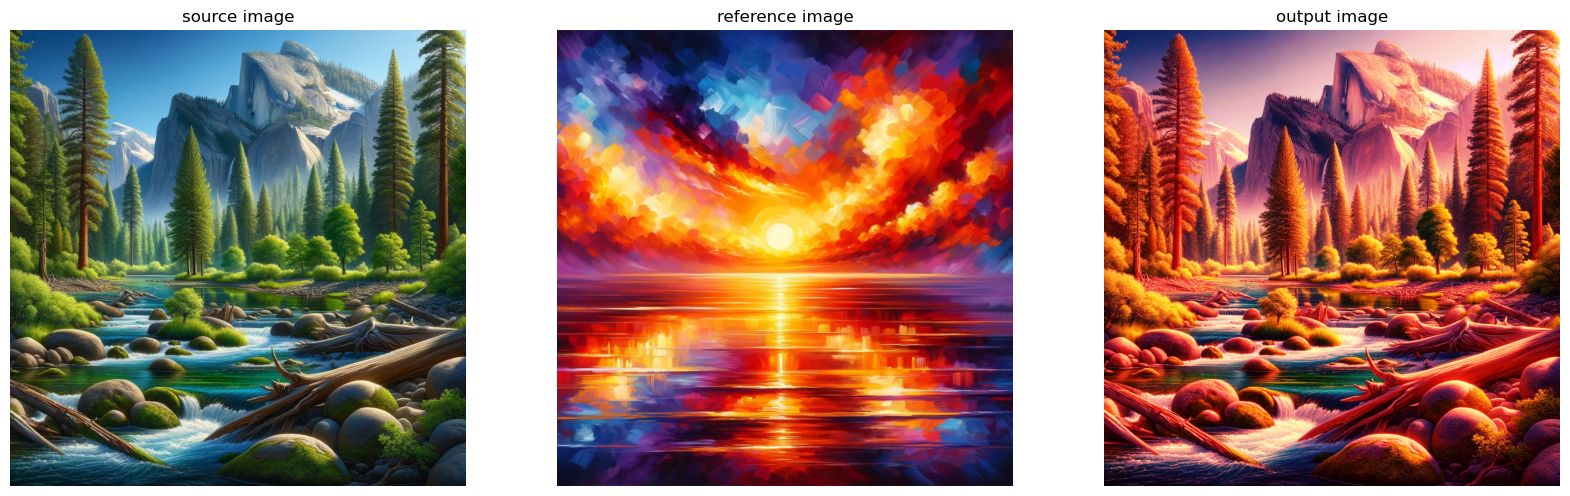

In [30]:
# Do not change this cell
src = cv2.imread('src.png')
ref = cv2.imread('ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

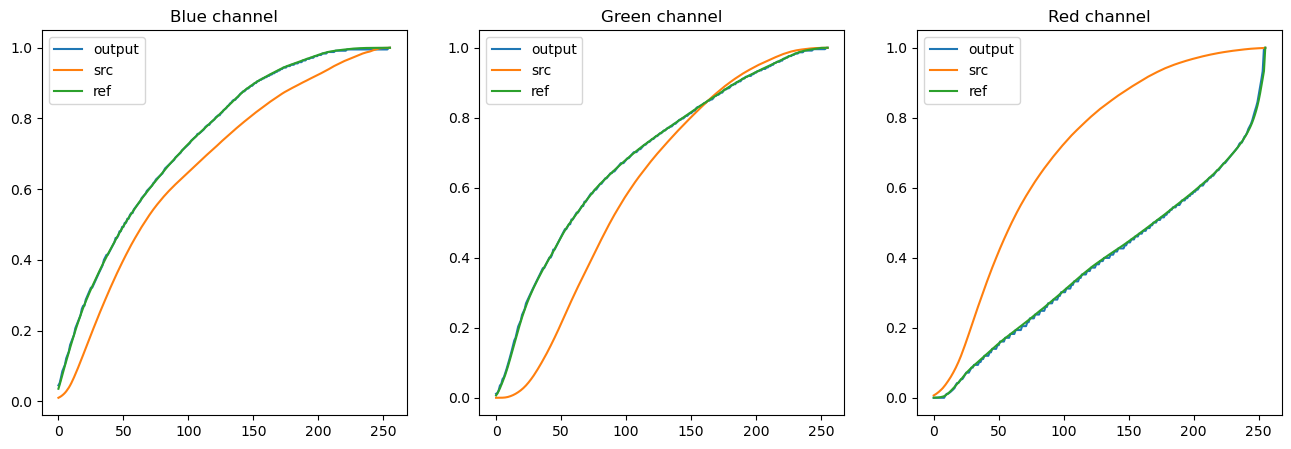

In [31]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)